In [1]:
import pandas as pd
database = pd.read_excel('database_TCC.xlsx')
database = database[['A','E','N','Rt']]
database

,A,E,N,Rt
0,25,1,11,1.638
1,25,1,5,2.595
2,25,2,8,1.976
3,25,3,11,4.164
4,25,3,5,2.869
5,35,1,8,1.421
6,35,2,11,1.564
7,35,2,5,2.101
8,35,3,8,1.591
9,25,1,8,1.946


In [2]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
standardscaler.fit(database)
data = standardscaler.transform(database)
database = pd.DataFrame(data,columns=database.columns)

In [5]:
import pickle
pickle.dump(standardscaler, open('standard_scaler_Rt.pkl','wb'))

In [3]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,max_error

def split_x_and_y(database,x,y):
  dataset_x = database[x]
  dataset_y = database[y]
  return dataset_x,dataset_y


def scores(Y_true, Y_predicted):
  r2 = r2_score(Y_true, Y_predicted)
  meansquarederror = mean_squared_error(Y_true, Y_predicted)
  meanabsoluteerror = mean_absolute_error(Y_true, Y_predicted)
  maxerror = max_error(Y_true, Y_predicted)

  print('r2:',r2,'meansquarederror:',meansquarederror,'meanabsoluteerror:',meanabsoluteerror,'maxerror:',maxerror)
  return r2,meansquarederror,meanabsoluteerror,maxerror


# Random Forest Regressor

In [4]:
# database.iloc[[0,2,4,5,7,8]]

dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=5000,random_state=100)
RFR.fit(dataset_x,dataset_y)
RFR.score(test_x,test_y)

0.3306427822593704

In [5]:
RFR.feature_importances_

array([0.21042855, 0.33216308, 0.45740836])

In [44]:
import pickle
pickle.dump(RFR, open('Random_Forest_Regressor_Rt.pkl', 'wb'))

# SVM

In [45]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

from sklearn import svm

svr = svm.SVR(kernel='sigmoid',C=3,gamma='auto')

svr.fit(dataset_x,dataset_y)
svr.score(test_x,test_y)

0.4359749662202925

In [46]:
import pickle
pickle.dump(svr, open('Support_Vector_Machine_Rt.pkl', 'wb'))

# MLP

In [29]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(max_iter=1000,random_state=100)
MLP.fit(dataset_x,dataset_y)
MLP.score(test_x,test_y)

-0.05892459425244634

In [23]:
# import pickle
# pickle.dump(MLP, open('MLP_Rt.sav', 'wb'))

# Keras

In [4]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python.keras.layers import Dense
import pandas as pd
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense

variables,results = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

model = keras.Sequential([
  layers.Dense(256*5, activation='sigmoid', input_shape=[len(variables.keys())]),
  # layers.Dropout(0.1),
  layers.Dense(256*5, activation='sigmoid'),
  layers.Dense(1)
])

# optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

history = model.fit(variables.values,results.values,epochs=125,validation_split=0.2)

Epoch 1/125
1/1 [==============================] - 1s 562ms/step - loss: 1.7420 - mse: 1.7420 - val_loss: 34.7392 - val_mse: 34.7392
Epoch 2/125
1/1 [==============================] - 0s 34ms/step - loss: 43.6279 - mse: 43.6279 - val_loss: 1.4723 - val_mse: 1.4723
Epoch 3/125
1/1 [==============================] - 0s 36ms/step - loss: 4.5262 - mse: 4.5262 - val_loss: 14.1996 - val_mse: 14.1996
Epoch 4/125
1/1 [==============================] - 0s 39ms/step - loss: 11.2312 - mse: 11.2312 - val_loss: 28.9999 - val_mse: 28.9999
Epoch 5/125
1/1 [==============================] - 0s 40ms/step - loss: 24.0266 - mse: 24.0266 - val_loss: 19.3893 - val_mse: 19.3893
Epoch 6/125
1/1 [==============================] - 0s 39ms/step - loss: 15.6050 - mse: 15.6050 - val_loss: 4.9523 - val_mse: 4.9523
Epoch 7/125
1/1 [==============================] - 0s 35ms/step - loss: 3.8571 - mse: 3.8571 - val_loss: 0.1494 - val_mse: 0.1494
Epoch 8/125
1/1 [==============================] - 0s 39ms/step - loss: 1

Text(0, 0.5, 'Erro Médio Quadrado')

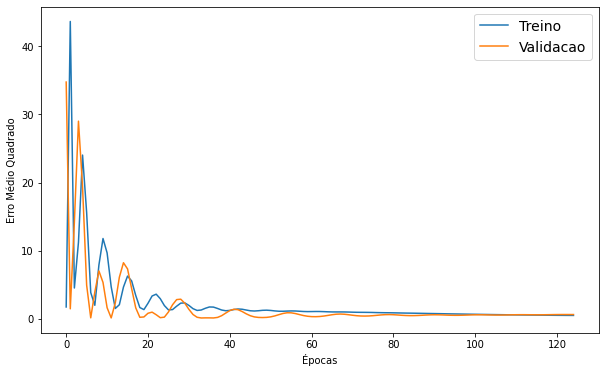

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.ylim([0, 5])
plt.legend(['Treino','Validacao'],prop={'size': 14})
plt.xlabel('Épocas')
plt.ylabel('Erro Médio Quadrado')

In [14]:
guess = model.predict(test_x.values)
desnormalizar = test_x.copy()
desnormalizar['Rt'] = guess
desnormalizado_teste = standardscaler.inverse_transform(desnormalizar)
desnormalizado_teste

1/1 [==============================] - 0s 66ms/step


array([[25.        ,  1.        ,  8.        ,  2.00328989],
       [25.        ,  2.        ,  5.        ,  2.62562428],
       [35.        ,  3.        , 11.        ,  2.46215184]])

In [15]:
desnormalizar = test_x.copy()
desnormalizar['Rt'] = test_y
desnormalizado_resultado = standardscaler.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.   ,  1.   ,  8.   ,  1.946],
       [25.   ,  2.   ,  5.   ,  2.991],
       [35.   ,  3.   , 11.   ,  2.896]])

In [17]:
scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

r2: 0.5133551356380042 meansquarederror: 0.10833525755471966 meanabsoluteerror: 0.28550459055169575 maxerror: 0.43384815857620085


(0.5133551356380042,
 0.10833525755471966,
 0.28550459055169575,
 0.43384815857620085)

In [25]:
model.save("keras_model_Rt.h5")

# KERAS BOXPLOT

In [5]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python.keras.layers import Dense
import pandas as pd
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense


predictions_rt = []


for i in range(0,30):
    variables,results = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')
    test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

    model = keras.Sequential([
    layers.Dense(256*5, activation='sigmoid', input_shape=[len(variables.keys())]),
    # layers.Dropout(0.1),
    layers.Dense(256*5, activation='sigmoid'),
    layers.Dense(1)
    ])

    # optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

    history = model.fit(variables.values,results.values,epochs=120,validation_split=0.2)

    guess = model.predict(test_x.values)
    desnormalizar = test_x.copy()
    desnormalizar['Rt'] = guess
    desnormalizado_teste = standardscaler.inverse_transform(desnormalizar)
    desnormalizado_teste

    desnormalizar = test_x.copy()
    desnormalizar['Rt'] = test_y
    desnormalizado_resultado = standardscaler.inverse_transform(desnormalizar)
    desnormalizado_resultado

    r2,meansquarederror,meanabsoluteerror,maxerror = scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

    predictions_rt.append(list(desnormalizado_teste[:,3]))

Epoch 1/120
1/1 [==============================] - 1s 610ms/step - loss: 1.4196 - mse: 1.4196 - val_loss: 37.7577 - val_mse: 37.7577
Epoch 2/120
1/1 [==============================] - 0s 32ms/step - loss: 46.9060 - mse: 46.9060 - val_loss: 1.4726 - val_mse: 1.4726
Epoch 3/120
1/1 [==============================] - 0s 30ms/step - loss: 4.5021 - mse: 4.5021 - val_loss: 15.3231 - val_mse: 15.3231
Epoch 4/120
1/1 [==============================] - 0s 37ms/step - loss: 12.1534 - mse: 12.1534 - val_loss: 31.5325 - val_mse: 31.5325
Epoch 5/120
1/1 [==============================] - 0s 44ms/step - loss: 26.2454 - mse: 26.2454 - val_loss: 22.2779 - val_mse: 22.2779
Epoch 6/120
1/1 [==============================] - 0s 29ms/step - loss: 18.0769 - mse: 18.0769 - val_loss: 6.7164 - val_mse: 6.7164
Epoch 7/120
1/1 [==============================] - 0s 31ms/step - loss: 5.1495 - mse: 5.1495 - val_loss: 0.1306 - val_mse: 0.1306
Epoch 8/120
1/1 [==============================] - 0s 32ms/step - loss: 1

In [6]:
df_boxplots = pd.DataFrame(predictions_rt,columns=['C1','C2','C3'])

<AxesSubplot:>

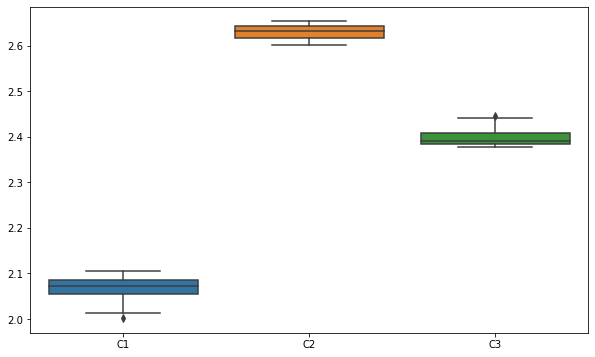

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(data=df_boxplots)

Text(0, 0.5, 'Rt')

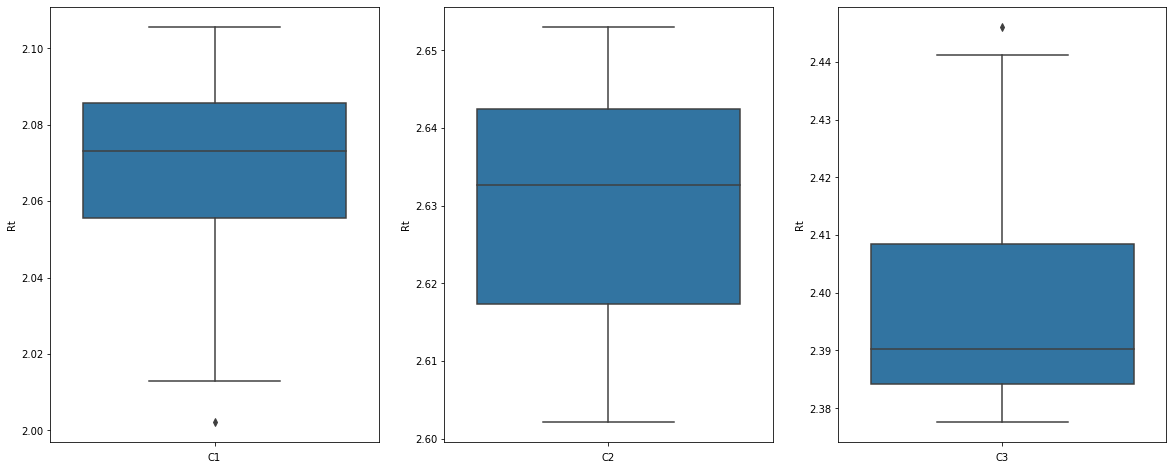

In [8]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_boxplots,y='C1')
plt.xlabel('C1')
plt.ylabel('Rt')


plt.subplot(1, 3, 2)
sns.boxplot(data=df_boxplots,y='C2')
plt.xlabel('C2')
plt.ylabel('Rt')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_boxplots,y='C3')
plt.xlabel('C3')
plt.ylabel('Rt')